# Network Notes

In [59]:
# good 160 unit *3 network
network_model = "b2-batch-v2-10-1"
iter1 = 10
iter2 = 100
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 55
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os

home = os.environ.get('HOME')

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
res = check_output(["tail", "-n 12", home + "/store/c2gen/out/"+network_model+"/log"])
res = str(res).replace('\\n', "\n")
print(res)
try:
  res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
except:
  res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
res = str(res).replace('\\n', "\n")
res = str(res).replace('\\r', "\n")
res = str(res).replace('\\x08', "")
res = res.split("\n")[-1]
print(res)



b'Generating samples 
saving generated sample output to:  out/b2-batch-v2-10-1/out-c2cb-20 
generating sample data of length:  200 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  50 
Training Iteration 21 
Training Iteration 22 
Training Iteration 23 
Training Iteration 24 
Training Iteration 25 
Training Iteration 26 
Training Iteration 27 
'
20000/29154 [===================>..........] - ETA: 24s - loss: 0.2129'


In [60]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [61]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout

lstm_2 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout

lstm_3 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout

time_distributed_1 : TimeDistributed
trainable?  True
 units
 activation
 dropout

dropout_1 : Dropout
trainable?  True
 units
 activation
 dropout



Early Iterations
===

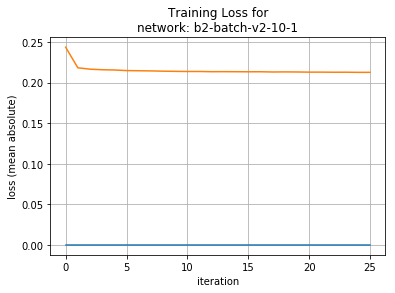

In [62]:
nd.plot_training_loss(network_model)

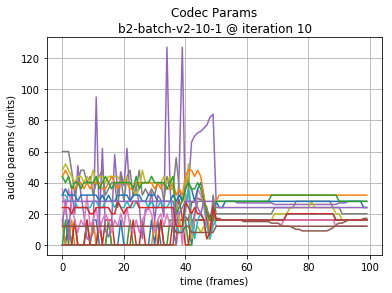

In [63]:
nd.plot_codec_params(network_model,iter1)

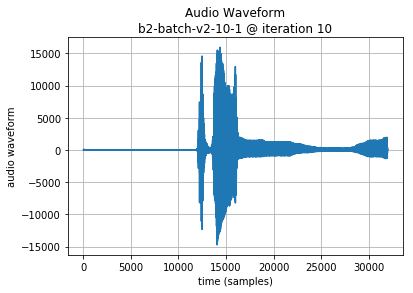

In [64]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [65]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

In [66]:
nd.plot_codec_params(network_model,iter2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/b2-batch-v2-10-1/out-c2cb-100'

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))